# Posttest 6

Sefelin Nada Para'pak <br>
2009106074

### Import Package

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

### Read Dataset

In [7]:
df = pd.read_csv("nodes.csv")
df.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156422 entries, 0 to 156421
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spotify_id  156422 non-null  object 
 1   name        156418 non-null  object 
 2   followers   156418 non-null  float64
 3   popularity  156422 non-null  int64  
 4   genres      156422 non-null  object 
 5   chart_hits  19641 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.2+ MB


In [21]:
df.isna().sum()

spotify_id         0
name               4
followers          4
popularity         0
genres             0
chart_hits    136781
dtype: int64

## Data Cleaning

In [18]:
dataset_cleaning = df.copy()

In [19]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

##  Mean

In [20]:
dataset_cleaning['followers'] = imputer_mean.fit_transform(dataset_cleaning[['followers']])

dataset_cleaning.isna().sum()

spotify_id         0
name               4
followers          0
popularity         0
genres             0
chart_hits    136781
dtype: int64

## Modus

In [23]:
dataset_cleaning['name'] = imputer_modus.fit_transform(dataset_cleaning[['name']])
dataset_cleaning['chart_hits'] = imputer_modus.fit_transform(dataset_cleaning[['chart_hits']])

dataset_cleaning.isna().sum()

spotify_id    0
name          0
followers     0
popularity    0
genres        0
chart_hits    0
dtype: int64

##  Median Nilai Tengah




In [24]:
dataset_cleaning['popularity'] = imputer_median.fit_transform(dataset_cleaning[['popularity']])

dataset_cleaning.isna().sum()

spotify_id    0
name          0
followers     0
popularity    0
genres        0
chart_hits    0
dtype: int64

In [25]:
dataset_cleaning.dropna(inplace=True)
dataset_cleaning.isna().sum()

spotify_id    0
name          0
followers     0
popularity    0
genres        0
chart_hits    0
dtype: int64

In [26]:
len(dataset_cleaning)


156422

## Data Duplikat

In [27]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

0

In [28]:
dataset_duplicate.drop_duplicates(inplace=True)
dataset_duplicate.duplicated().sum()

0

## K-MEANS

In [29]:
dataset_cleaning

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24.0,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72.0,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36.0,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52.0,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39.0,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
...,...,...,...,...,...,...
156417,2ces6d2YsQP1RpGMYpdFy8,David Urwitz,5470.0,29.0,['classic swedish pop'],['se (1)']
156418,6AeznZajNbXUulT7W4tK5l,Darmiko,2022.0,23.0,[],['se (1)']
156419,3GEijIjrgb4lPe9WtURBzz,Katriell,268.0,0.0,[],['se (1)']
156420,0ldQL0icSoMz9OOZcWG8Zt,Yung Fresh,181.0,19.0,[],['se (1)']


In [30]:
dataset_model = KMeans(n_clusters=4)

In [31]:
point = dataset_cleaning[['popularity','followers']]

In [32]:
dataset_model.fit(point)

KMeans(n_clusters=4)

In [33]:
labels = dataset_model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
nilai_x = point['popularity']
nilai_y = point['followers']

In [35]:
data_centroid = dataset_model.cluster_centers_

In [36]:
data_centroid

array([[2.08711537e+01, 4.23253658e+04],
       [8.31428571e+01, 2.49303502e+07],
       [7.23894737e+01, 5.54086424e+06],
       [9.10000000e+01, 6.43256423e+07]])

In [37]:
centroid_xc = data_centroid[:,0]
centroid_yc = data_centroid[:,1]

## Visualisasi

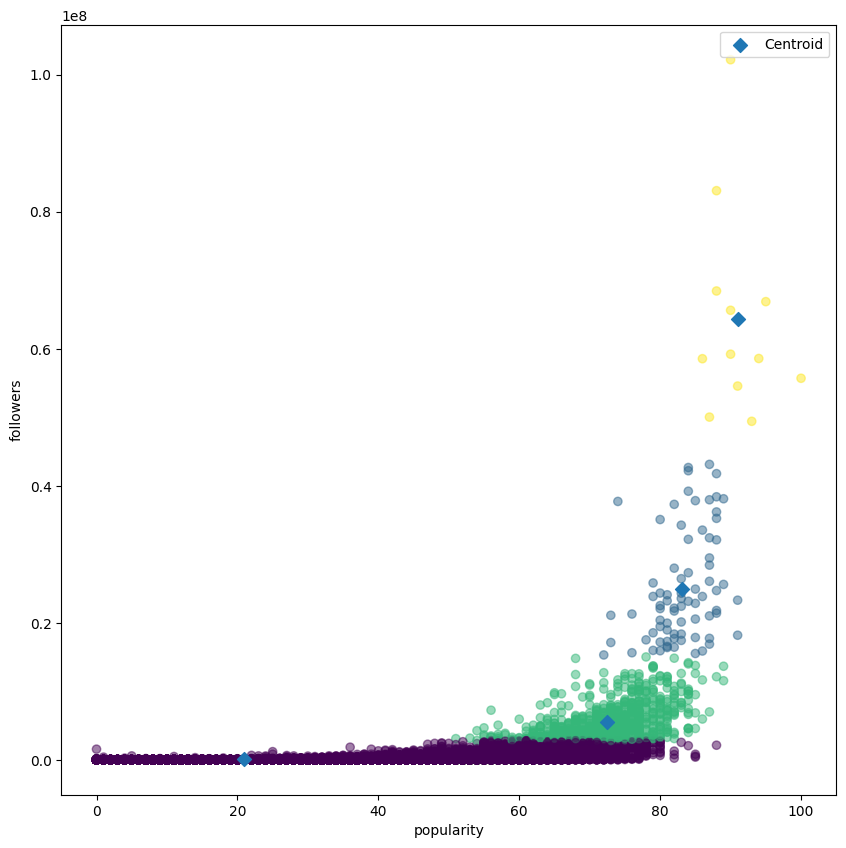

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(nilai_x, nilai_y, alpha=0.5, c=labels)
plt.scatter(centroid_xc, centroid_yc, marker='D', s=50, label='Centroid')
plt.xlabel('popularity')
plt.ylabel('followers')
plt.legend()
plt.show()

In [39]:
cluster_range = range(1,8)
inertias = []
for k in cluster_range:
    dataset_model = KMeans(n_clusters=k)
    dataset_model.fit(point)
    inertias.append(dataset_model.inertia_)

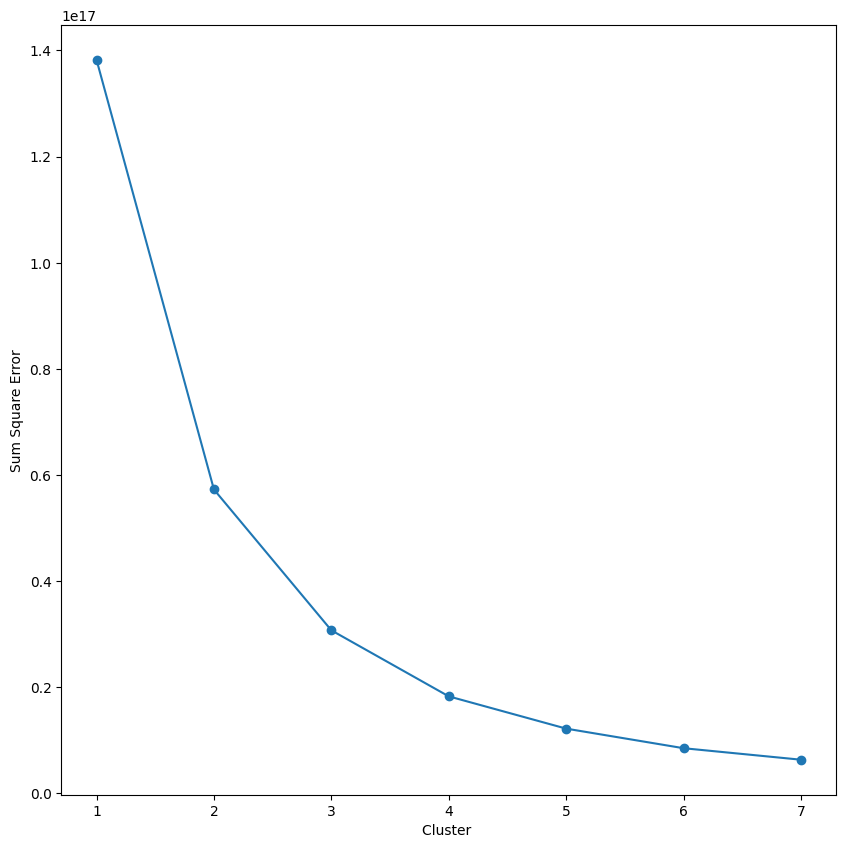

In [40]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ')
plt.ylabel('Sum Square Error')
plt.xticks(cluster_range)
plt.show()

In [41]:
df.to_csv("nodesUnsupervised.csv")